In [1]:
# import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

import scienceplots

plt.style.use(['science', 'grid', 'nature', 'notebook'])

In [2]:
qt.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}


In [2]:
def load_data(path2data):
    with open(path2data, 'r') as f:
        data = f.read()

        # cargo time step
        index_time_step = data.find('time step:')
        index_time_step_end = data.find('\n', index_time_step)
        h = float(data[index_time_step+len('time step:'):index_time_step_end])

        # cargo time_limits:
        index_time_limits = data.find('time limits:')
        index_time_limits_end = data.find('\n', index_time_limits)
        time_limits = data[index_time_limits+len('time limits:'):index_time_limits_end].split(',')
        time_limits = [float(i) for i in time_limits]

        # Cargo estados
        index_start_shape = data.find('shape:')
        index_end_shape = data.find('\n', index_start_shape)
        shape = data[index_start_shape+len('shape:'):index_end_shape].split(',')
        shape = [int(i) for i in shape]

        index_start_n_states = data.find('n_states:')
        index_end_n_states = data.find('\n', index_start_n_states)
        n_states = int(data[index_start_n_states+len('n_states:'):index_end_n_states])

        states = data[index_end_n_states+2:].strip().split('),(')   # separo los estados
        states[-1] = states[-1][:-1]    # saco el ultimo parentesis

        # los paso a numeros complejos de numpy
        res = np.empty(n_states*shape[0]*shape[1], dtype=complex)
        for i, state in enumerate(states):
            state_splited = state.split(',')
            res[i] = complex(float(state_splited[0]), float(state_splited[1]))

        res = res.reshape(n_states, shape[0], shape[1])

        return res, h, time_limits


In [3]:
path2data = "../results/results_phi_plus_prueba.csv"
path2data_2 = "../results/results_phi_plus_2.csv"
path2data_minnus = "../results/results_phi_plus_minnus.csv"
path2data_detunned = "../results/results_phi_plus_detunned.csv"
path2data_death = "../results/results_standar_death_1.csv"


states, h, time_limits = load_data(path2data)
states_2, h_2, time_limits_2 = load_data(path2data_2)
states_m, h_m, time_limits_m = load_data(path2data_minnus)
states_d, h_d, time_limits_d = load_data(path2data_detunned)
states_death, h_death, time_limits_death = load_data(path2data_death)

states.shape

(10001, 4, 4)

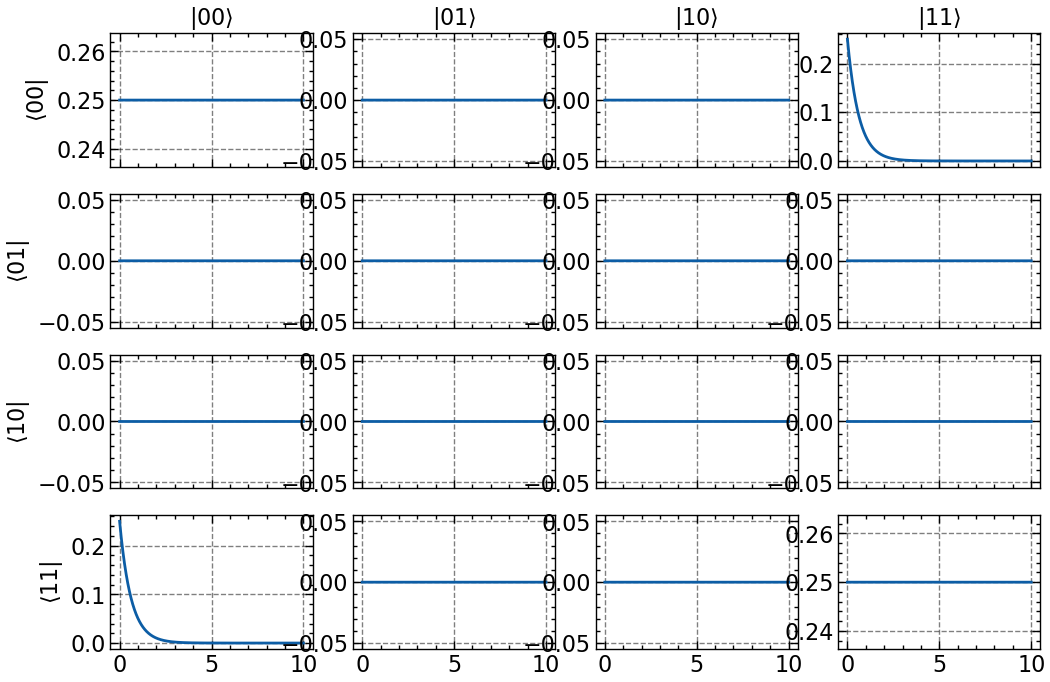

In [4]:
wq = 1
gamma_minus = 0.1

time_axis = np.arange(time_limits[0], time_limits[1]+h, h)

# Imprimo los resultados
fig, ax = plt.subplots(4, 4, figsize=(12, 8), sharex=True)

colums = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
rows = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

for i in range(4):
    for j in range(4):
        ax[i, j].plot(time_axis, np.abs(states[:, i, j])**2)
        if i == 0:
            ax[i, j].set_title(colums[j])

        if j == 0:
            ax[i, j].set_ylabel(rows[i])

In [5]:
H = wq/2 * qt.tensor(qt.sigmaz(), qt.qeye(2)) + wq/2 * qt.tensor(qt.qeye(2), qt.sigmaz())
C_phi = np.sqrt(gamma_minus) * qt.tensor(qt.sigmaz(), qt.qeye(2)) + np.sqrt(gamma_minus) * qt.tensor(qt.qeye(2), qt.sigmaz())

psi_0 = qt.bell_state('00')

# Calculo la evolucion temporal
res = qt.mesolve(H, psi_0, time_axis, [C_phi], [])
states_qutip = np.array(res.states)

states_qutip.shape

(10001,)

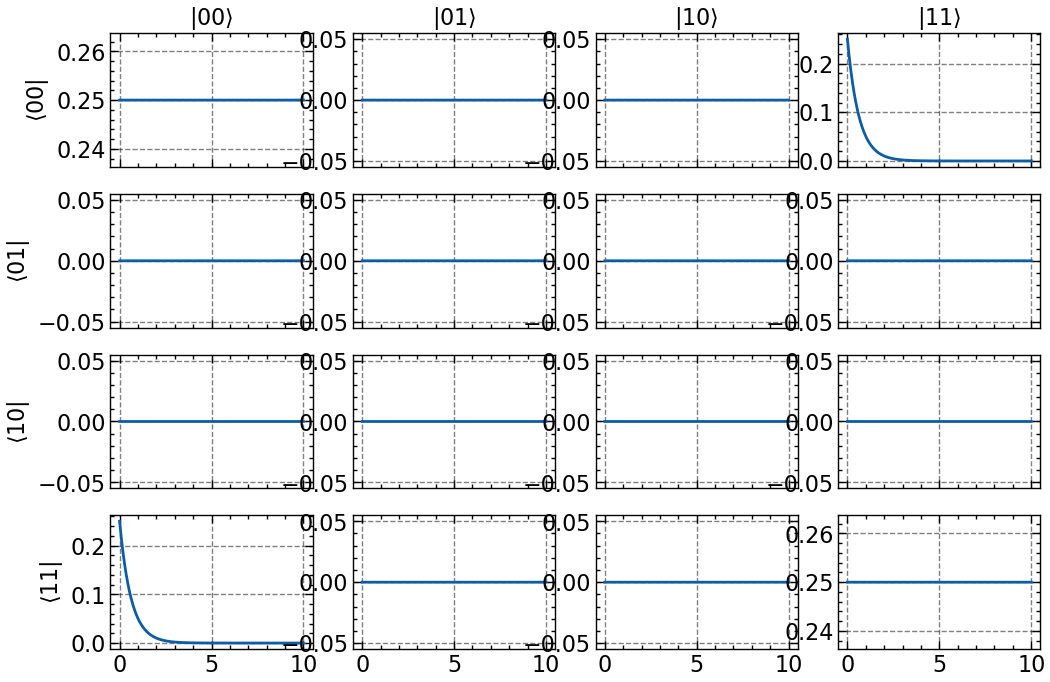

In [6]:
wq = 1
gamma_minus = 0.1

time_axis = np.arange(time_limits[0], time_limits[1]+h, h)

# Imprimo los resultados
fig, ax = plt.subplots(4, 4, figsize=(12, 8), sharex=True)

colums = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
rows = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

for i in range(4):
    for j in range(4):
        y_axis = np.array([np.abs(s.full()[i, j])**2 for s in states_qutip])
        ax[i, j].plot(time_axis, y_axis)
        if i == 0:
            ax[i, j].set_title(colums[j])

        if j == 0:
            ax[i, j].set_ylabel(rows[i])

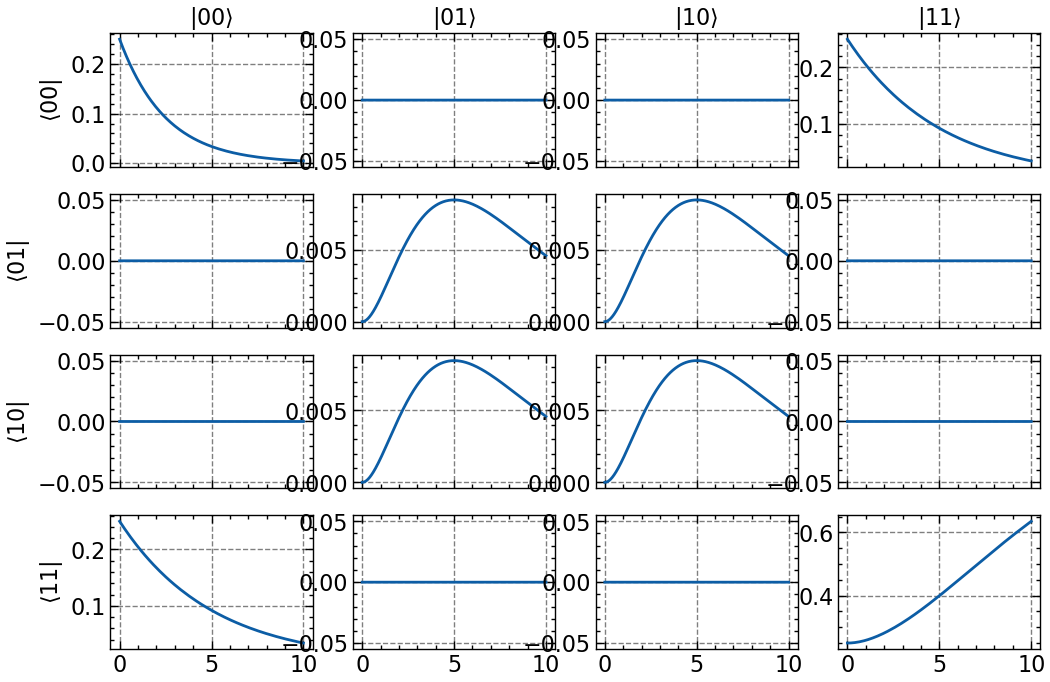

In [7]:
time_axis = np.arange(time_limits_m[0], time_limits_m[1]+h_m, h_m)

# Imprimo los resultados
fig, ax = plt.subplots(4, 4, figsize=(12, 8), sharex=True)

colums = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
rows = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

for i in range(4):
    for j in range(4):
        ax[i, j].plot(time_axis, np.abs(states_m[:, i, j])**2)
        if i == 0:
            ax[i, j].set_title(colums[j])

        if j == 0:
            ax[i, j].set_ylabel(rows[i])

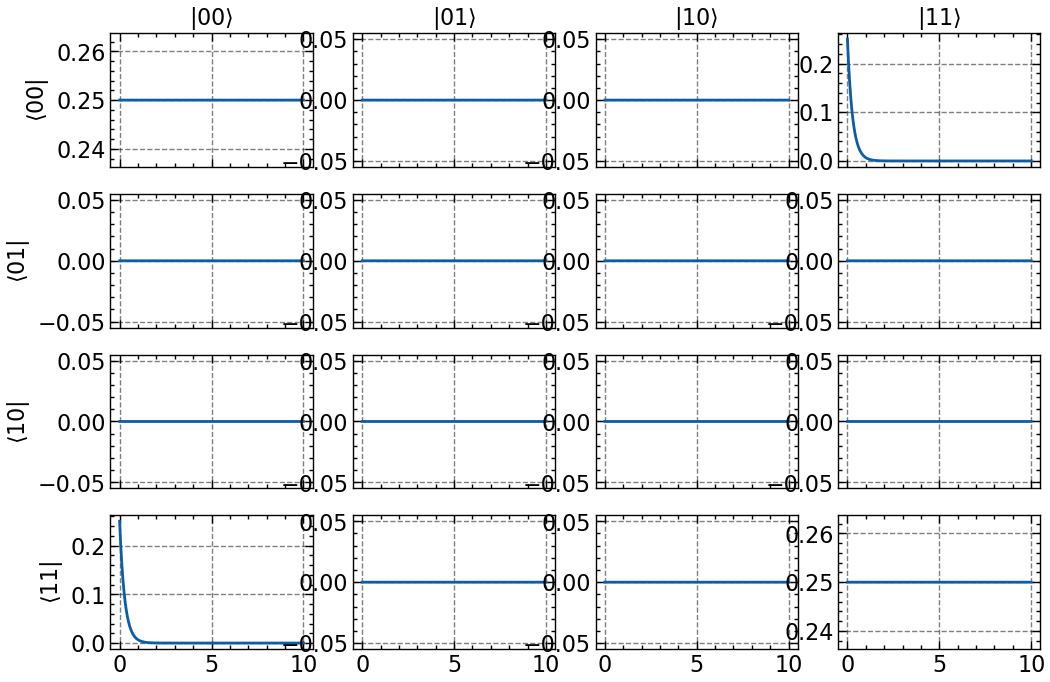

In [8]:
time_axis = np.arange(time_limits_d[0], time_limits_d[1]+h_d, h_d)

# Imprimo los resultados
fig, ax = plt.subplots(4, 4, figsize=(12, 8), sharex=True)

colums = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
rows = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

for i in range(4):
    for j in range(4):
        ax[i, j].plot(time_axis, np.abs(states_d[:, i, j])**2)
        if i == 0:
            ax[i, j].set_title(colums[j])

        if j == 0:
            ax[i, j].set_ylabel(rows[i])

In [18]:
states_death.shape

(10001, 4, 4)

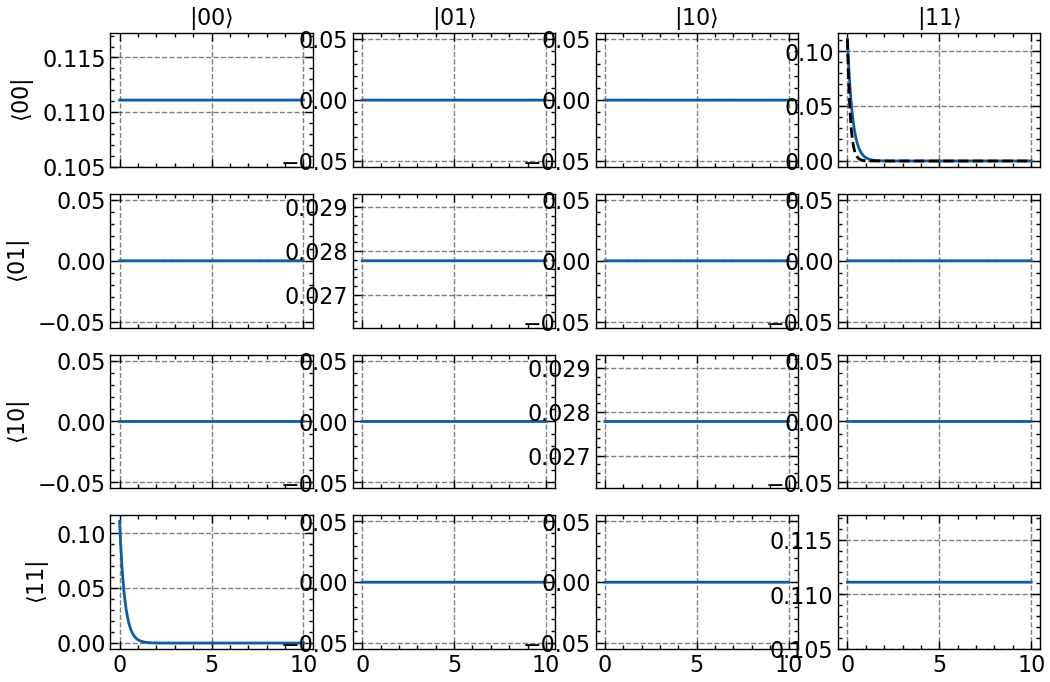

In [ ]:
time_axis = np.arange(time_limits_death[0], time_limits_death[1]+h_death, h_death)

# Imprimo los resultados
fig, ax = plt.subplots(4, 4, figsize=(12, 8), sharex=True)


colums = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
rows = [r'$\langle 00|$', r'$\langle 01|$', r'$\langle 10|$', r'$\langle 11|$']

for i in range(4):
    for j in range(4):
        ax[i, j].plot(time_axis, np.abs(states_death[:, i, j])**2)
        if i == 0:
            ax[i, j].set_title(colums[j])
        if j == 0:
            ax[i, j].set_ylabel(rows[i])
        

In [10]:
def concurrence(states):
    return np.array([qt.concurrence(qt.Qobj(s, dims=[[2, 2], [2, 2]])) for s in states])

In [11]:
conc_qt = concurrence(states_qutip)
conc = concurrence(states)
conc_2 = concurrence(states_2)
conc_m = concurrence(states_m)
conc_d = concurrence(states_d)
conc_death = concurrence(states_death)

8.606223396176005e-09


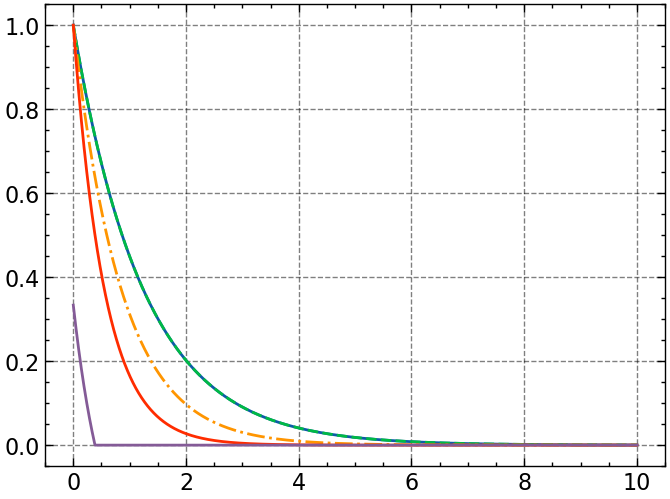

In [12]:
plt.plot(time_axis, conc)
plt.plot(time_axis, conc_qt, '--')
plt.plot(time_axis, conc_2, '-.')
# plt.plot(time_axis, conc_m, ':')
plt.plot(time_axis, conc_d, '-')
plt.plot(time_axis, conc_death, '-')

print(conc_d.min())

# plt.axvline(x=time_axis[, color='k', linestyle='--')

In [13]:
states = np.array([qt.Qobj(s, dims=[[2, 2], [2, 2]]) for s in states])

In [14]:
pa = np.array([qt.ptrace(s, 0) for s in states])
pb = np.array([qt.ptrace(s, 1) for s in states])

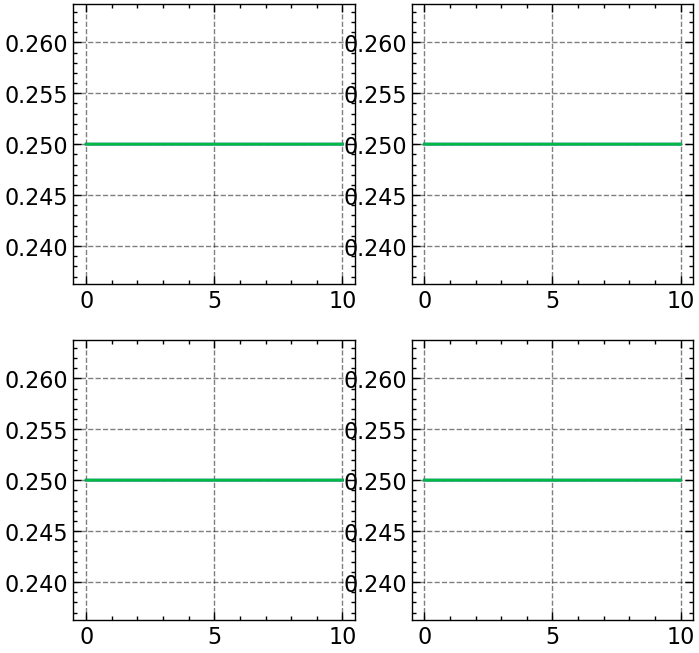

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):
    for j in range(2):
        y1_data = np.array([np.abs(s.full()[i, i])**2 for s in pa])
        y2_data = np.array([np.abs(s.full()[j, j])**2 for s in pb])
        ax[i, j].plot(time_axis, y1_data, color='C0') 
        ax[i, j].plot(time_axis, y2_data, color='C1')


In [16]:
qt.ket2dm(qt.bell_state('00'))

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]

In [17]:
qt.tensor(qt.qeye(2), qt.sigmaz())

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]